<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/Assignment_19(18_06_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSE-221710301019-PRASAD REDDY**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load the dataset in a proper structure

In [22]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/PritamGuha31/COVID-19-Analysis/master/datasets/covid_19_india.csv",parse_dates=["Date"])
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1313,1314,2020-04-25,5:00 PM,Telengana,-,-,253,26,984
1314,1315,2020-04-25,5:00 PM,Tripura,-,-,1,0,2
1315,1316,2020-04-25,5:00 PM,Uttarakhand,-,-,25,0,48
1316,1317,2020-04-25,5:00 PM,Uttar Pradesh,-,-,248,26,1778


In [24]:
df.drop("Sno",axis=1,inplace=True)

In [30]:
df.rename(columns={"State/UnionTerritory":"State/ut","ConfirmedIndianNational":"CIndian","ConfirmedForeignNational":"CForeigner"},inplace=True)

In [31]:
df.head()

,Date,Time,State/ut,CIndian,CForeigner,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


Get the number of rows and columns from the dataset


In [33]:
df.shape

(1318, 8)

Check how many categorical and numerical columns are there
- Categorical - object type
- Numerical - int,float
- Boolean - bool


In [38]:
df.dtypes

Date          datetime64[ns]
Time                  object
State/ut              object
CIndian               object
CForeigner            object
Cured                  int64
Deaths                 int64
Confirmed              int64
dtype: object

Get the basic descriptive information from the dataset 


In [39]:
df.describe()

,Cured,Deaths,Confirmed
count,1318.000000,1318.000000,1318.000000
mean,30.939302,6.631259,214.399848
std,92.963392,25.189408,569.223462
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.250000
50%,2.000000,0.000000,20.000000
75%,18.000000,3.000000,132.000000
max,957.000000,301.000000,6817.000000


In [41]:
df.describe(include="O")

,Time,State/ut,CIndian,CForeigner
count,1318,1318,1318,1318
unique,6,36,62,12
top,6:00 PM,Kerala,-,-
freq,600,87,872,872


Get the frequency of the categories in all the columns of the dataset


In [47]:
df.nunique()

Date           87
Time            6
State/ut       36
CIndian        62
CForeigner     12
Cured         162
Deaths         76
Confirmed     379
dtype: int64

Check for the missing values and if found any visualize the missing values using seaborn, missingno libraries.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


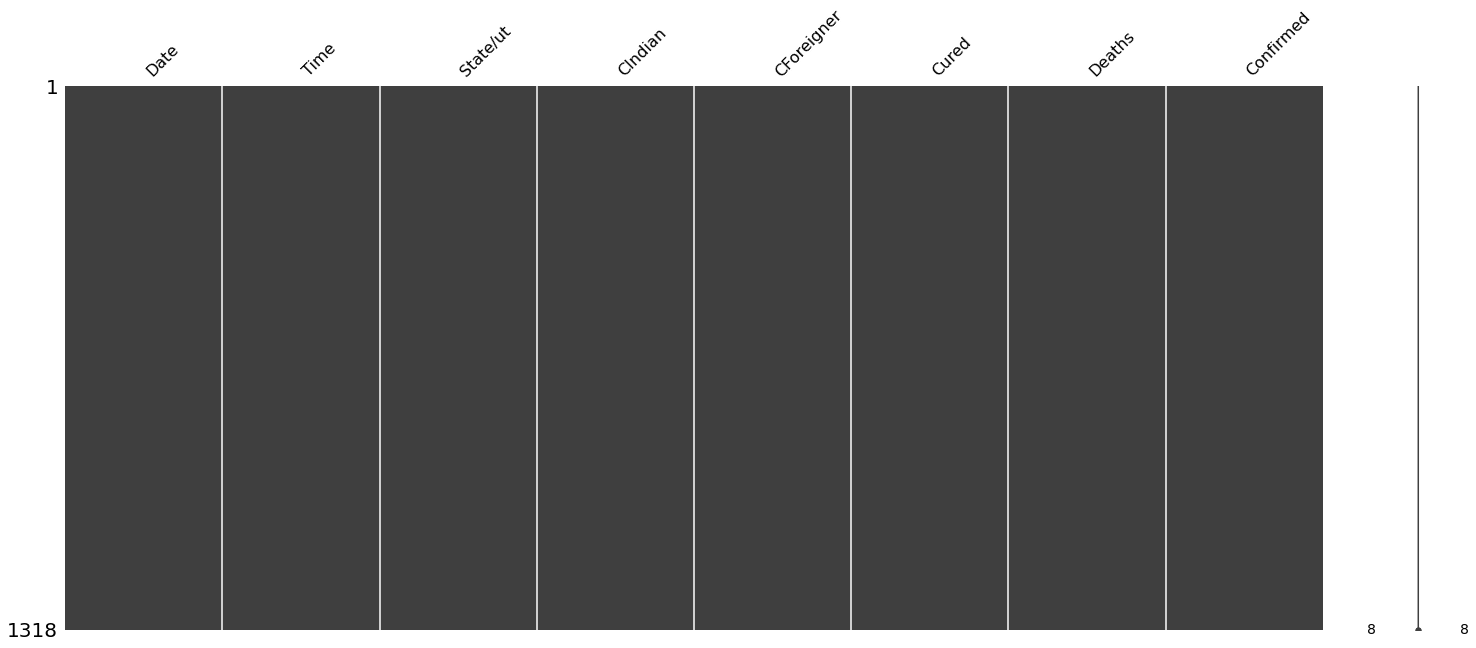

In [48]:
import missingno as mn
mn.matrix(df)

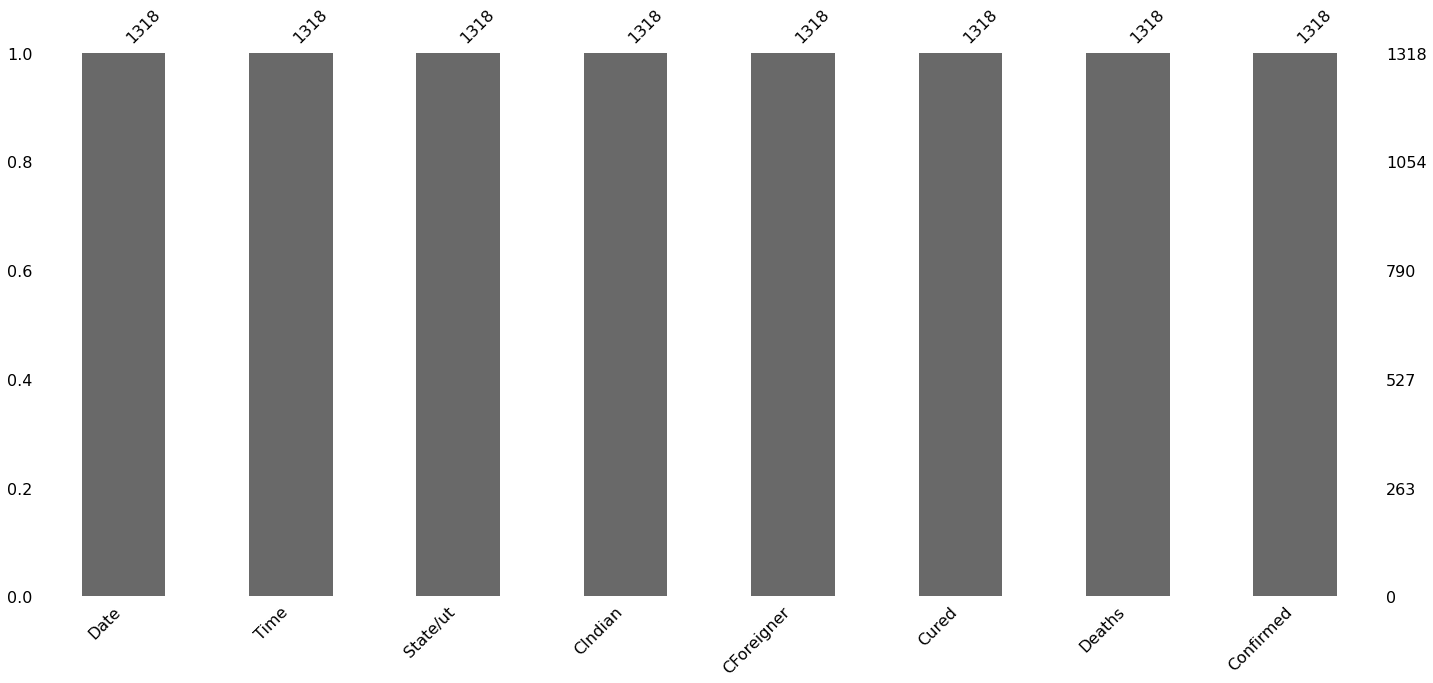

In [49]:
mn.bar(df)

In [51]:
df.isna().sum()
#no null values

Date          0
Time          0
State/ut      0
CIndian       0
CForeigner    0
Cured         0
Deaths        0
Confirmed     0
dtype: int64

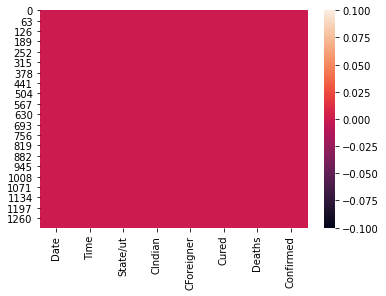

In [54]:
sns.heatmap(df.isna())

Plot all the columns from the dataset; try to get some observations from the plot and write your inferences below the plots generated

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febec1abc50>,
      dtype=object)

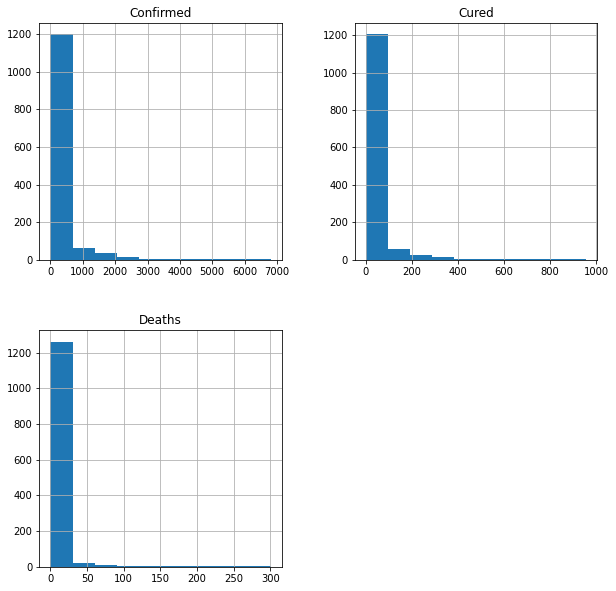

In [57]:
#visualizing numerical columns
df.hist(figsize=(10,10))

In [71]:
#top 5 states with more confirmed cases till date
df_final = df[df["Date"]=="2020-04-25"]
df_final.head()

,Date,Time,State/ut,CIndian,CForeigner,Cured,Deaths,Confirmed
1286,2020-04-25,5:00 PM,Andaman and Nicobar Islands,-,-,11,0,27
1287,2020-04-25,5:00 PM,Andhra Pradesh,-,-,171,31,1061
1288,2020-04-25,5:00 PM,Arunachal Pradesh,-,-,1,0,1
1289,2020-04-25,5:00 PM,Assam,-,-,19,1,36
1290,2020-04-25,5:00 PM,Bihar,-,-,46,2,228


In [74]:
#sorting according to max confirmed cases
df_final = df_final.sort_values(by=["Confirmed"],ascending=False)
df_final.head(5)

,Date,Time,State/ut,CIndian,CForeigner,Cured,Deaths,Confirmed
1304,2020-04-25,5:00 PM,Maharashtra,-,-,957,301,6817
1295,2020-04-25,5:00 PM,Gujarat,-,-,265,127,2815
1293,2020-04-25,5:00 PM,Delhi,-,-,857,53,2514
1311,2020-04-25,5:00 PM,Rajasthan,-,-,230,27,2034
1303,2020-04-25,5:00 PM,Madhya Pradesh,-,-,210,92,1952


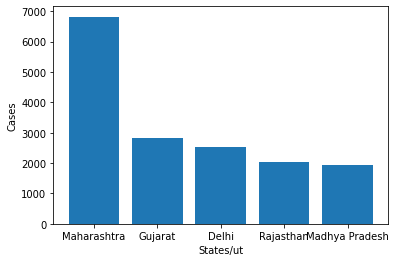

In [114]:

plt.bar(df_final["State/ut"][:5],df_final["Confirmed"][:5])
plt.xlabel("States/ut")
plt.ylabel("Cases")
plt.show()

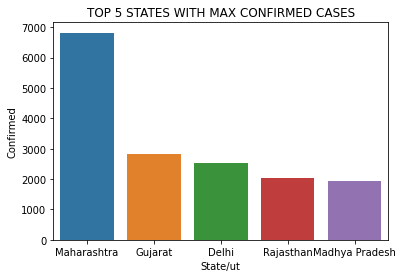

In [119]:
p = sns.barplot(x="State/ut",y="Confirmed",data=df_final.head(5))
p.set_title("TOP 5 STATES WITH MAX CONFIRMED CASES")
plt.show()
#maharastra has highest confirmed cases

In [123]:
df_final = df_final.sort_values(by=["Deaths"],ascending=False).head(5)
df_final

,Date,Time,State/ut,CIndian,CForeigner,Cured,Deaths,Confirmed
1304,2020-04-25,5:00 PM,Maharashtra,-,-,957,301,6817
1295,2020-04-25,5:00 PM,Gujarat,-,-,265,127,2815
1303,2020-04-25,5:00 PM,Madhya Pradesh,-,-,210,92,1952
1293,2020-04-25,5:00 PM,Delhi,-,-,857,53,2514
1287,2020-04-25,5:00 PM,Andhra Pradesh,-,-,171,31,1061


In [130]:
# TOP 5 STATES WITH MAXIMUM DEATHS
df_final["Deaths"]

1304    301
1295    127
1303     92
1293     53
1287     31
Name: Deaths, dtype: int64

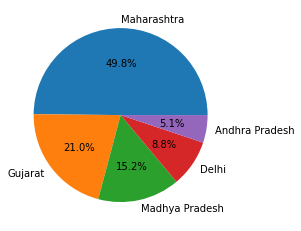

In [154]:
plt.pie("Deaths",data=df_final,autopct="%0.1f%%",labels=list(df_final["State/ut"]))
plt.show()
#half of the deaths in the country occured in maharastra

<Figure size 720x720 with 0 Axes>

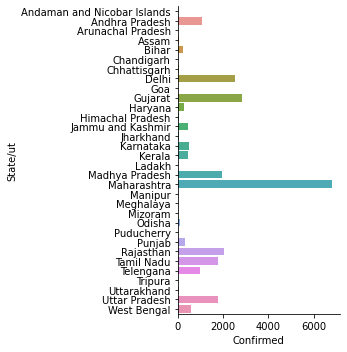

In [228]:
plt.figure(figsize=(10,10))
p=sns.catplot(y="State/ut",x="Confirmed",data=df[df["Date"]=="2020-04-25"],kind="bar")
plt.show()

<Figure size 7200x1440 with 0 Axes>

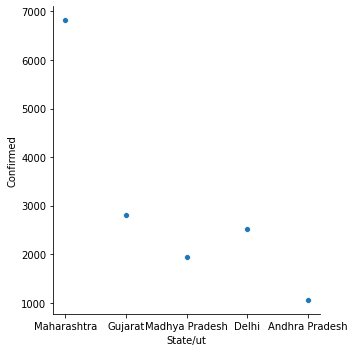

In [209]:
plt.figure(figsize=(100,20))
sns.relplot(x="State/ut",y="Confirmed",data=df_final)

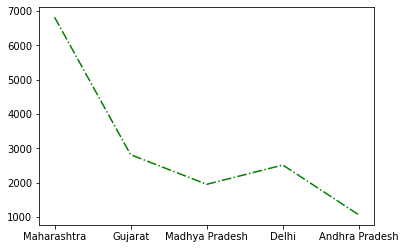

In [205]:
plt.plot(df_final["State/ut"],df_final["Confirmed"],linestyle="-.",color="green")

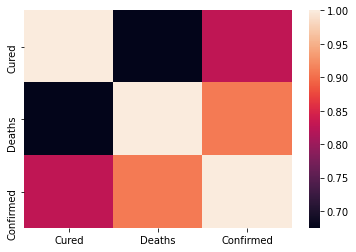

In [212]:
sns.heatmap(df.corr())

Select any column as output  from the dataset and plot the output column with some of the input columns, which are suitable from your data columns


In [214]:
y = df["Deaths"]
y

0        0
1        0
2        0
3        0
4        0
        ..
1313    26
1314     0
1315     0
1316    26
1317    18
Name: Deaths, Length: 1318, dtype: int64

In [215]:
X = df["State/ut"]

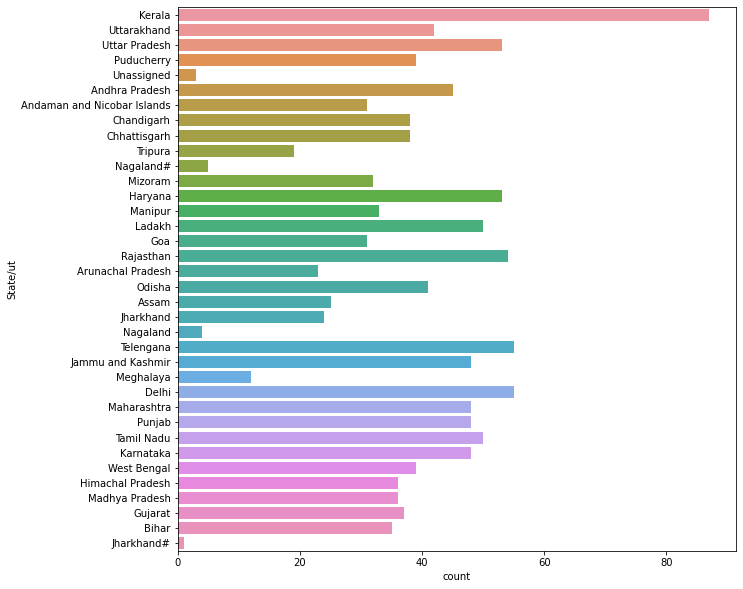

In [238]:
plt.figure(figsize=(10,10))
sns.countplot(y="State/ut",data=df.sort_values(by=["Deaths"]))
plt.show()

Encode the categorical columns using different kinds of encoding techniques from pandas and scikit-learn



In [240]:
df.columns[2]

'State/ut'

In [244]:
df = pd.concat([df,pd.get_dummies(df["State/ut"],drop_first=True)],axis=1)

In [245]:
df.shape

(1318, 43)

In [246]:
df.columns

Index(['Date', 'Time', 'State/ut', 'CIndian', 'CForeigner', 'Cured', 'Deaths',
       'Confirmed', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Jharkhand#',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nagaland#', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')